In [1]:
import torch
from PIL import Image
import requests
from lavis.models import load_model_and_preprocess

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


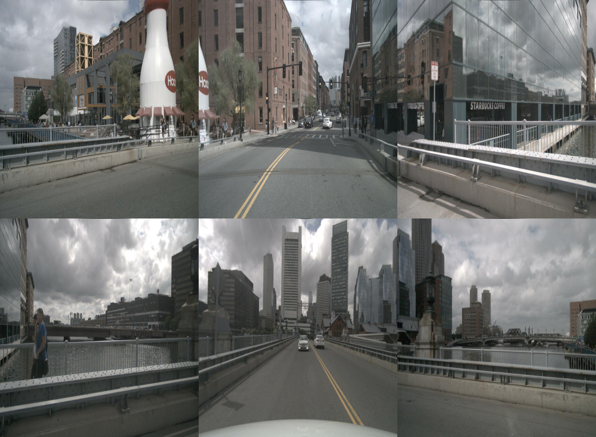

In [2]:
back = Image.open("/research/nfs_yilmaz_15/kwag/data/download/n008-2018-08-01-15-16-36-0400__CAM_BACK__1533151603537558.jpg").convert("RGB")
back_left = Image.open("/research/nfs_yilmaz_15/kwag/data/download/n008-2018-08-01-15-16-36-0400__CAM_BACK_LEFT__1533151603547405.jpg").convert("RGB")
back_right = Image.open("/research/nfs_yilmaz_15/kwag/data/download/n008-2018-08-01-15-16-36-0400__CAM_BACK_RIGHT__1533151603528113.jpg").convert("RGB")
cam_front = Image.open("/research/nfs_yilmaz_15/kwag/data/download/n008-2018-08-01-15-16-36-0400__CAM_FRONT__1533151603512404.jpg").convert("RGB")
cam_left = Image.open("/research/nfs_yilmaz_15/kwag/data/download/n008-2018-08-01-15-16-36-0400__CAM_FRONT_LEFT__1533151603504799.jpg").convert("RGB")
cam_right = Image.open("/research/nfs_yilmaz_15/kwag/data/download/n008-2018-08-01-15-16-36-0400__CAM_FRONT_RIGHT__1533151603520482.jpg").convert("RGB")

# Assuming all images have the same size
width, height = back.size

# Create a new blank image with the size to fit all six images
# For simplicity, placing them in a 2x3 grid
raw_image = Image.new('RGB', (width * 3, height * 2))

# Paste the images into the new image
raw_image.paste(cam_left, (0, 0))
raw_image.paste(cam_front, (width, 0))
raw_image.paste(cam_right, (width * 2, 0))
raw_image.paste(back_right, (0, height))
raw_image.paste(back, (width, height))
raw_image.paste(back_left, (width * 2, height))

display(raw_image.resize((596, 437)))

In [3]:
# setup device to use
device = torch.device("cuda:0") if torch.cuda.is_available() else "cpu"

In [4]:
# loads InstructBLIP model
model, vis_processors, _ = load_model_and_preprocess(
    name="blip2_t5_instruct", 
    model_type="flant5xl", 
    is_eval=True, 
    device=device
)
# prepare the image
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)

WARNING - 2024-08-06 15:34:09,792 - warnings - /home/kwag.3/anaconda3/envs/lavis/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(



INFO - 2024-08-06 15:34:18,446 - blip2_t5_instruct - freeze vision encoder


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

INFO - 2024-08-06 15:34:34,140 - blip2 - load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/LAVIS/models/InstructBLIP/instruct_blip_flanxl_trimmed.pth


{'vis_processor': {'train': {'name': 'blip_image_train', 'image_size': 224}, 'eval': {'name': 'blip_image_eval', 'image_size': 224}}, 'text_processor': {'train': {'name': 'blip_caption'}, 'eval': {'name': 'blip_caption'}}}


In [5]:
model.generate({"image": image, "prompt": "Describe the image in details."})

WARNING - 2024-08-06 15:34:35,771 - warnings - /home/kwag.3/anaconda3/envs/lavis/lib/python3.8/site-packages/transformers/generation/configuration_utils.py:367: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(



['The image features a series of images taken from a car driving down a city street. There are four images in the collage, each representing a different view of the city. There is a car in the middle of the road, while two other cars can be seen on either side of the road. There are several buildings in the background, including a tall skyscraper and a building with a clock tower. There is also a street sign visible in the middle of the road. Overall, the image offers a glimpse of a bustling city.']